In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [6]:
url = "https://www.basketball-reference.com/players/b/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/117.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

In [8]:
response = requests.get(url, headers=headers)

print(response.status_code)   # should be 200 if allowed
print(response.text[:100])   # show first 1000 chars of HTML

200

<!DOCTYPE html>
<html data-version="klecko-" data-root="/home/bbr/build" lang="en" class="no-js" >



In [10]:
def height_to_inches(height_str):
    if height_str and '-' in height_str:
        feet, inches = height_str.split('-')
        return int(feet) * 12 + int(inches)
    return None

In [12]:
url = "https://www.basketball-reference.com/players/b/"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find('table', {'id': 'players'})

In [17]:
players_data = []

if table:
    rows = table.tbody.find_all('tr')
    for row in rows:
        player_name = row.find('th', {'data-stat': 'player'}).text.strip()
        colleges = row.find('td', {'data-stat': 'colleges'}).text.strip() if row.find('td', {'data-stat': 'colleges'}) else ''
        birth_date = row.find('td', {'data-stat': 'birth_date'}).text.strip() if row.find('td', {'data-stat': 'birth_date'}) else ''
        weight_str = row.find('td', {'data-stat': 'weight'}).text.strip() if row.find('td', {'data-stat': 'weight'}) else ''
        height_str = row.find('td', {'data-stat': 'height'}).text.strip() if row.find('td', {'data-stat': 'height'}) else ''
        position = row.find('td', {'data-stat': 'pos'}).text.strip() if row.find('td', {'data-stat': 'pos'}) else ''
        year_from_str = row.find('td', {'data-stat': 'year_min'}).text.strip() if row.find('td', {'data-stat': 'year_min'}) else ''
        year_to_str = row.find('td', {'data-stat': 'year_max'}).text.strip() if row.find('td', {'data-stat': 'year_max'}) else ''

        # Convert height string like "6-7" to total inches integer
        height = height_to_inches(height_str)

        # Convert weight and years to integers where possible
        weight = int(weight_str) if weight_str.isdigit() else None
        year_from = int(year_from_str) if year_from_str.isdigit() else None
        year_to = int(year_to_str) if year_to_str.isdigit() else None

        players_data.append({
            'Player': player_name,
            'Colleges': colleges,
            'Birth Date': birth_date,
            'Weight': weight,
            'Height': height,
            'Position': position,
            'From Year': year_from,
            'To Year': year_to
        })

In [19]:
# Create DataFrame
df = pd.DataFrame(players_data)

print(df.head())

         Player                            Colleges         Birth Date  \
0    Chris Babb              Penn State, Iowa State  February 14, 1990   
1  Luke Babbitt                              Nevada      June 20, 1989   
2   Miloš Babić  Tennessee Technological University  November 23, 1968   
3   Johnny Bach                             Fordham      July 10, 1924   
4  Dwayne Bacon                       Florida State    August 30, 1995   

   Weight  Height Position  From Year  To Year  
0     225      77        G       2014     2014  
1     225      81        F       2011     2018  
2     240      84      C-F       1991     1992  
3     180      74      F-G       1949     1949  
4     221      78        G       2018     2021  


In [21]:
df.to_csv('players_data.csv', index=False)

In [23]:
df.head()

,Player,Colleges,Birth Date,Weight,Height,Position,From Year,To Year
0,Chris Babb,"Penn State, Iowa State","February 14, 1990",225,77,G,2014,2014
1,Luke Babbitt,Nevada,"June 20, 1989",225,81,F,2011,2018
2,Miloš Babić,Tennessee Technological University,"November 23, 1968",240,84,C-F,1991,1992
3,Johnny Bach,Fordham,"July 10, 1924",180,74,F-G,1949,1949
4,Dwayne Bacon,Florida State,"August 30, 1995",221,78,G,2018,2021


In [25]:
df.size # rows X columns

4064

In [27]:
df.shape

(508, 8)

In [29]:
df.isnull().sum()

Player        0
Colleges      0
Birth Date    0
Weight        0
Height        0
Position      0
From Year     0
To Year       0
dtype: int64

In [31]:
df.info

<bound method DataFrame.info of               Player                            Colleges         Birth Date  \
0         Chris Babb              Penn State, Iowa State  February 14, 1990   
1       Luke Babbitt                              Nevada      June 20, 1989   
2        Miloš Babić  Tennessee Technological University  November 23, 1968   
3        Johnny Bach                             Fordham      July 10, 1924   
4       Dwayne Bacon                       Florida State    August 30, 1995   
..               ...                                 ...                ...   
503       Will Bynum               Arizona, Georgia Tech    January 4, 1983   
504        Walt Byrd                              Temple                      
505     Marty Byrnes                            Syracuse     April 30, 1956   
506     Tommy Byrnes                          Seton Hall  February 19, 1923   
507  Michael Bytzura              Long Island University      June 18, 1922   

     Weight  Height

In [33]:
df.describe()

,Weight,Height,From Year,To Year
count,508.000000,508.000000,508.000000,508.000000
mean,208.342520,78.011811,1990.669291,1994.974409
std,25.568271,3.647681,23.328900,24.130344
min,135.000000,63.000000,1947.000000,1947.000000
25%,190.000000,76.000000,1972.750000,1976.000000
50%,208.000000,78.000000,1993.000000,1999.000000
75%,225.000000,80.250000,2012.000000,2018.000000
max,360.000000,91.000000,2025.000000,2025.000000


In [35]:
df.dtypes

Player        object
Colleges      object
Birth Date    object
Weight         int64
Height         int64
Position      object
From Year      int64
To Year        int64
dtype: object

In [37]:
num_df = df.select_dtypes(include=["int64", "float64"])
print("Numerical data:\n")
print(num_df.dtypes)

Numerical data:

Weight       int64
Height       int64
From Year    int64
To Year      int64
dtype: object


In [39]:
cat_df = df.select_dtypes(include=["object"])
print("Categorical data:\n")
print(cat_df.dtypes)

Categorical data:

Player        object
Colleges      object
Birth Date    object
Position      object
dtype: object


In [41]:
print(df['Colleges'].value_counts())

Colleges
                            40
UCLA                        12
Kentucky                    10
UNC                          9
Oregon                       8
                            ..
Assumption University        1
North Carolina A&T           1
Pitt, UNLV                   1
Indiana State University     1
Arizona, Georgia Tech        1
Name: count, Length: 227, dtype: int64


In [43]:
print(df['Position'].value_counts())

Position
G      184
F      145
C       57
F-C     41
G-F     37
F-G     26
C-F     18
Name: count, dtype: int64


In [45]:
df['Player'].value_counts()

Player
Dee Brown          2
Chris Babb         1
Mike Bratz         1
Ronnie Brewer      1
Ron Brewer         1
                  ..
Ben Bentil         1
Kent Benson        1
Keith Benson       1
David Benoit       1
Michael Bytzura    1
Name: count, Length: 507, dtype: int64

In [47]:
df['Birth Date'].value_counts()

Birth Date
August 31, 1952      2
August 26, 1947      2
December 3, 1951     2
November 20, 1975    2
November 12, 1992    2
                    ..
March 29, 1995       1
December 27, 1954    1
August 13, 1988      1
May 9, 1968          1
June 18, 1922        1
Name: count, Length: 503, dtype: int64

In [64]:
# help(pd.crosstab)

 ### Using pd.crosstab I observed that, it gives the count of values between two categorical columns

In [66]:
#### Categorical data:

#### Player        object
#### Colleges      object
#### Birth Date    object
#### Position      object
#### dtype: object

In [ ]:
pd.crosstab(df['Player'],df['Colleges'],dropna=False)

In [ ]:
pd.crosstab(df['Birth Date'],df['Colleges'],dropna=False)

In [ ]:
pd.crosstab(df['Colleges'],df['Birth Date'],dropna=False)

In [ ]:
pd.crosstab(df['Birth Date'],df['Colleges'],dropna=False)

In [58]:
df.duplicated().sum()

0

In [60]:
df.isnull().sum()

Player        0
Colleges      0
Birth Date    0
Weight        0
Height        0
Position      0
From Year     0
To Year       0
dtype: int64

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scy

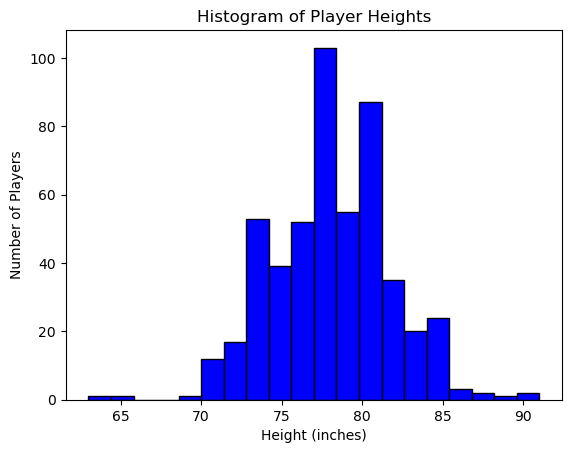

In [82]:
plt.hist(df['Height'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Number of Players')
plt.show()


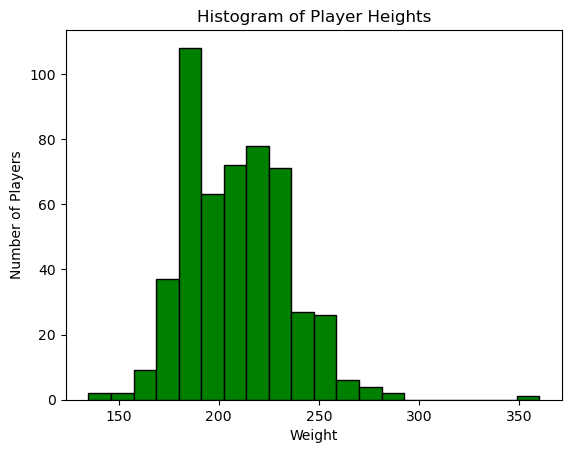

In [84]:
import matplotlib.pyplot as plt

plt.hist(df['Weight'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Histogram of Player Heights')
plt.xlabel('Weight')
plt.ylabel('Number of Players')
plt.show()


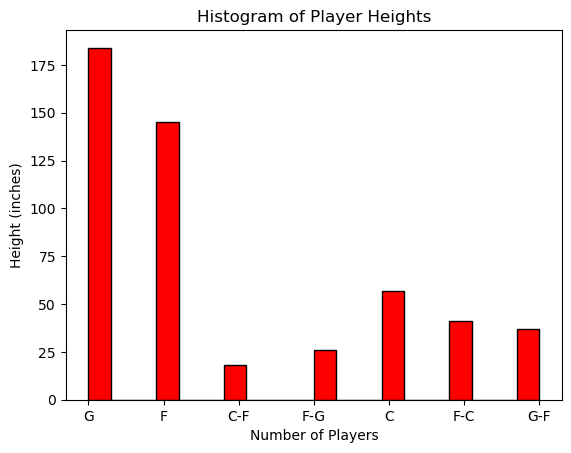

In [88]:
plt.hist(df['Position'].dropna(), bins=20, color='red', edgecolor='black')
plt.title('Histogram of Player Heights')
plt.ylabel('Height (inches)')
plt.xlabel('Number of Players')
plt.show()


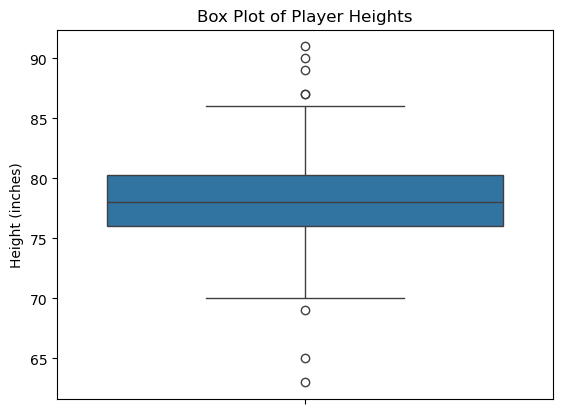

In [96]:
sns.boxplot(y=df['Height'].dropna())
plt.title('Box Plot of Player Heights')
plt.ylabel('Height (inches)')
plt.show()

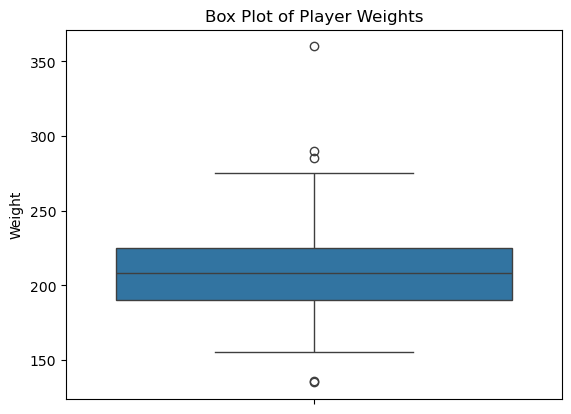

In [104]:
sns.boxplot(y=df['Weight'].dropna())
plt.title('Box Plot of Player Weights')
plt.ylabel('Weight')
plt.show()

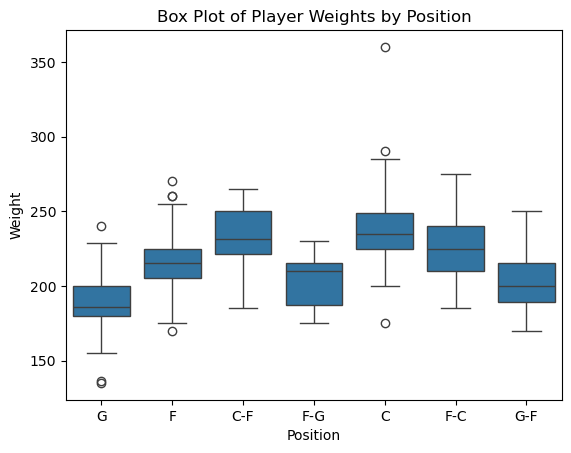

In [106]:
sns.boxplot(x='Position', y='Weight', data=df)
plt.title('Box Plot of Player Weights by Position')
plt.xlabel('Position')
plt.ylabel('Weight')
plt.show()


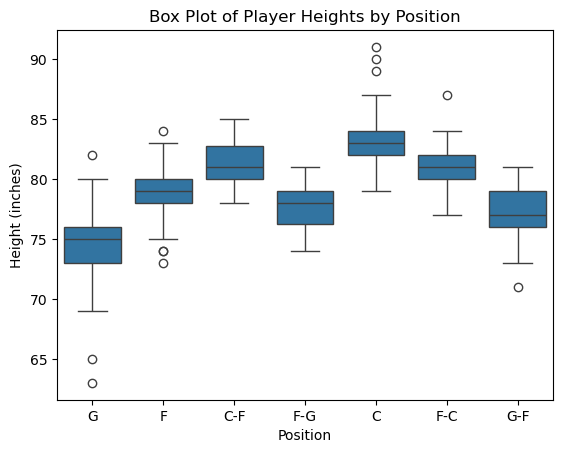

In [98]:
sns.boxplot(x='Position', y='Height', data=df)
plt.title('Box Plot of Player Heights by Position')
plt.xlabel('Position')
plt.ylabel('Height (inches)')
plt.show()


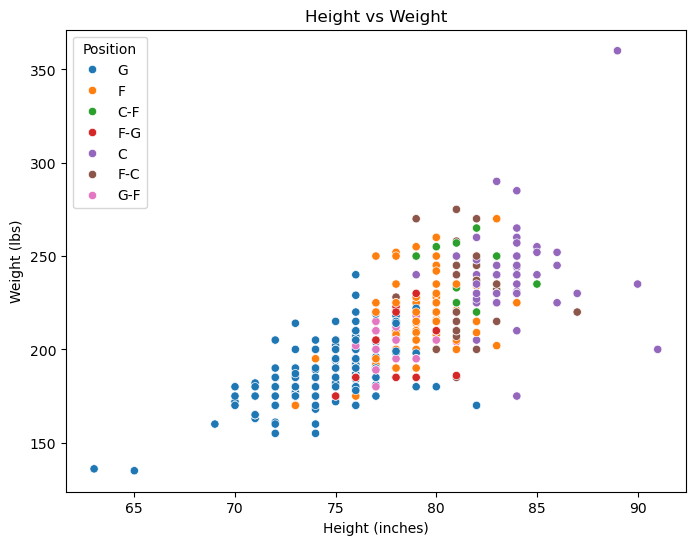

In [112]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Height', y='Weight',hue='Position', data=df)
plt.title('Height vs Weight')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.show()


#### In basketball, 
* G typically refers to guards (Point Guard and Shooting Guard),
* F refers to forwards (Small Forward and Power Forward),
* C is the Center,
* Point Guard (PG) initiating plays and the Center (C).

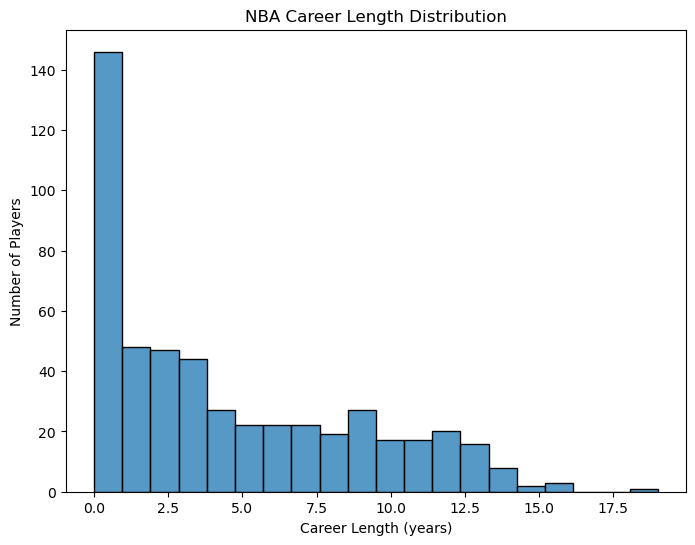

In [120]:
df['CareerLength'] = df['To Year'] - df['From Year']
plt.figure(figsize=(8,6))
sns.histplot(df['CareerLength'].dropna(), bins=20, kde=False)
plt.title('NBA Career Length Distribution')
plt.xlabel('Career Length (years)')
plt.ylabel('Number of Players')
plt.show()

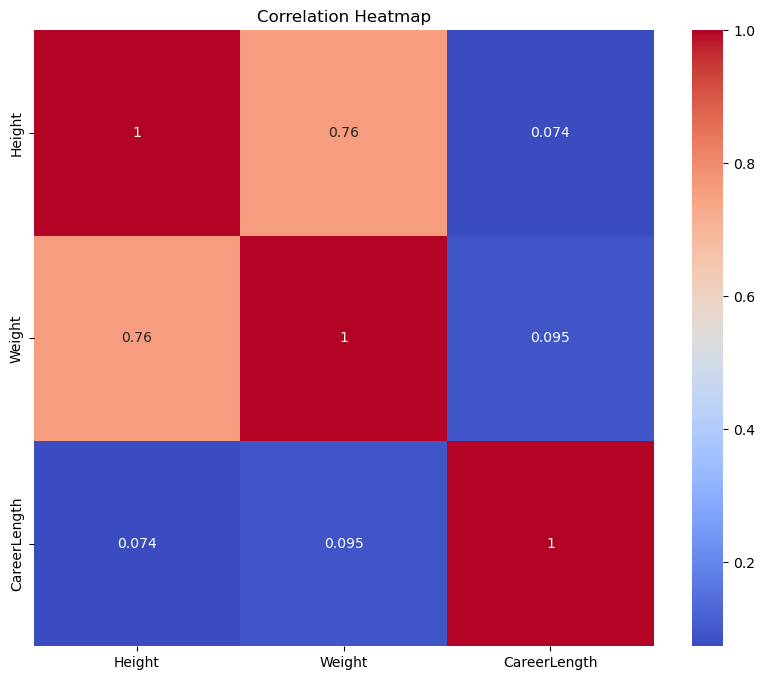

In [122]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Height', 'Weight', 'CareerLength']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [134]:
df['CareerLength'] = df['To Year'] - df['From Year']
career_start_counts = df['From Year'].value_counts().sort_index()
career_length_counts = df['CareerLength'].value_counts().sort_index()

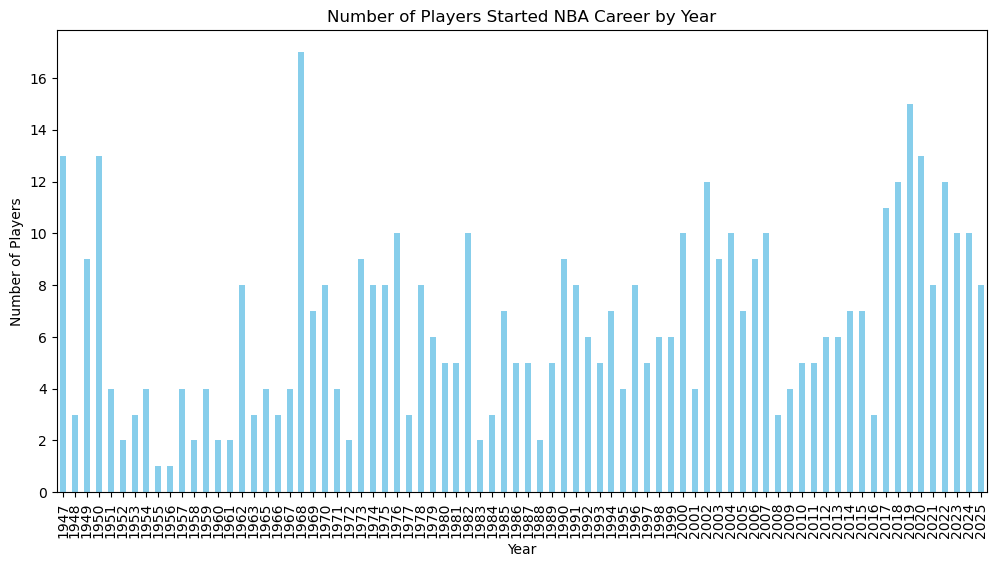

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
career_start_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players Started NBA Career by Year')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.show()


In [150]:
avg_by_position = df.groupby('Position').agg(
    avg_height=('Height', 'mean'),
    avg_weight=('Weight', 'mean'),
    avg_career_length=('CareerLength', 'mean')
).reset_index()
print(avg_by_position)

  Position  avg_height  avg_weight  avg_career_length
0        C   83.456140  237.894737           4.105263
1      C-F   81.333333  232.944444           4.722222
2        F   79.020690  215.896552           3.186207
3      F-C   80.878049  226.341463           6.365854
4      F-G   77.692308  204.923077           6.692308
5        G   74.744565  188.614130           4.038043
6      G-F   77.351351  201.810811           6.162162


In [154]:
# Calculate Career Length (years)
df['CareerLength'] = df['To Year'] - df['From Year']

In [156]:
# 1. Count players recruited per college per "From Year"
college_recruitment = df.groupby(['Colleges', 'From Year']).size().reset_index(name='PlayerCount')
print(college_recruitment.head())

  Colleges  From Year  PlayerCount
0                1947            1
1                1948            1
2                1949            1
3                1995            1
4                1997            2


In [158]:
# 2. Average Height, Weight, Career Length by Position
pos_stats = df.groupby('Position').agg(
    Avg_Height=('Height', 'mean'),
    Avg_Weight=('Weight', 'mean'),
    Avg_Career_Length=('CareerLength', 'mean')
).reset_index()
print(pos_stats)

  Position  Avg_Height  Avg_Weight  Avg_Career_Length
0        C   83.456140  237.894737           4.105263
1      C-F   81.333333  232.944444           4.722222
2        F   79.020690  215.896552           3.186207
3      F-C   80.878049  226.341463           6.365854
4      F-G   77.692308  204.923077           6.692308
5        G   74.744565  188.614130           4.038043
6      G-F   77.351351  201.810811           6.162162


In [160]:
# 3. Number of players recruited each year
yearly_recruitment = df.groupby('From Year').size().reset_index(name='PlayersRecruited')
print(yearly_recruitment)

    From Year  PlayersRecruited
0        1947                13
1        1948                 3
2        1949                 9
3        1950                13
4        1951                 4
..        ...               ...
73       2021                 8
74       2022                12
75       2023                10
76       2024                10
77       2025                 8

[78 rows x 2 columns]


In [162]:
# 4. Median, max, min Height by position
height_stats = df.groupby('Position')['Height'].agg(['mean', 'median', 'max', 'min']).reset_index()
print(height_stats)

  Position       mean  median  max  min
0        C  83.456140    83.0   91   79
1      C-F  81.333333    81.0   85   78
2        F  79.020690    79.0   84   73
3      F-C  80.878049    81.0   87   77
4      F-G  77.692308    78.0   81   74
5        G  74.744565    75.0   82   63
6      G-F  77.351351    77.0   81   71


In [164]:
# 5. Filter players with career longer than 10 years
long_career_players = df[df['CareerLength'] > 10]
print(long_career_players[['Player', 'CareerLength']])

              Player  CareerLength
9        John Bagley            11
16      Thurl Bailey            15
24         Vin Baker            12
31      Greg Ballard            11
44   Leandro Barbosa            13
..               ...           ...
470       Alec Burks            13
486         Don Buse            12
490     Caron Butler            13
494     Jimmy Butler            13
498    Rasual Butler            13

[67 rows x 2 columns]


In [166]:
# 6. Group by Colleges and Positions, count players
college_pos_counts = df.groupby(['Colleges', 'Position']).size().reset_index(name='Count')
print(college_pos_counts.head())

  Colleges Position  Count
0                 C      8
1               C-F      2
2                 F     14
3               F-C      3
4               F-G      1


In [168]:
# 7. Players born after 1990 grouped by Position
df['Birth Year'] = pd.to_datetime(df['Birth Date']).dt.year
young_players_by_pos = df[df['Birth Year'] > 1990].groupby('Position').size().reset_index(name='Count')
print(young_players_by_pos)

  Position  Count
0        C     10
1      C-F      3
2        F     34
3      F-C      4
4      F-G      4
5        G     45
6      G-F     13


In [170]:
# 8. Top colleges by number of players recruited
top_colleges = college_recruitment.groupby('Colleges')['PlayerCount'].sum().sort_values(ascending=False).head(10)
print(top_colleges)

Colleges
             40
UCLA         12
Kentucky     10
UNC           9
Temple        8
Duke          8
Oregon        8
NC State      8
Minnesota     7
UConn         6
Name: PlayerCount, dtype: int64


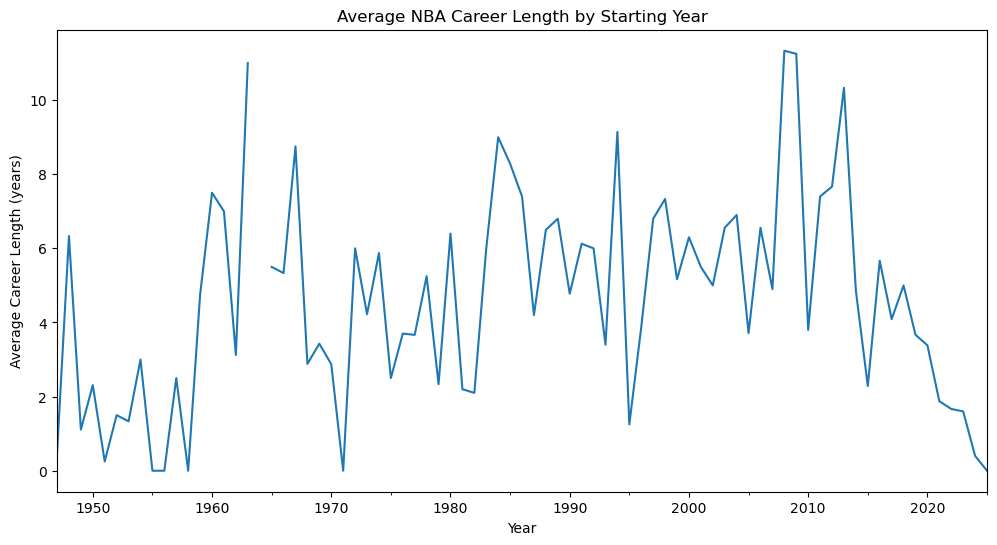

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'From Year' and 'To Year' as integers
# Create a 'CareerLength' column first
df['CareerLength'] = df['To Year'] - df['From Year']

# Convert 'From Year' to datetime type for time series index (assuming January 1st as date)
df['From Year Date'] = pd.to_datetime(df['From Year'].astype(str) + '-01-01')

# Set the datetime column as index for time series operations
df = df.set_index('From Year Date')
avg_career_length = df.resample('YE')['CareerLength'].mean()

avg_career_length.plot(figsize=(12,6))
plt.title('Average NBA Career Length by Starting Year')
plt.xlabel('Year')
plt.ylabel('Average Career Length (years)')
plt.show()


In [254]:
median=df['Height'].median()
q1 = df['height_in'].quantile(0.25)
q3 = df['height_in'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(median)
print(iqr)
print(lower,upper)

78.0
4.25
69.625 86.625
